## Machine learning project:Ecommerce customer churn prediction

#### Contents:
1. Data Preparation
2. Feature Engineering
3. Exploratory Data Analysis
4. Model Buiding
5. Model Evaluation

##  1. Data Preparation

### 1.1 Import Libraries

In [1]:

import pandas as pd # linear algebra
import numpy as np # data processing, CSV file
import matplotlib.pyplot as plt #visualization
import seaborn as sns # visualization
import warnings
warnings.filterwarnings("ignore")
!pip install missingno
import missingno as msno
!pip install pivottablejs
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
!pip install imbalanced-learn
import imblearn
print(imblearn.__version__)


0.9.0


### 1.2 Loading data

In [2]:
df=pd.read_excel("E Commerce Dataset.xlsx",sheet_name="E Comm")

### 1.3 Inspecting data

In [3]:
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [4]:
df.shape

(5630, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [6]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [7]:
df.isnull().sum()* 100 / len(df)

CustomerID                     0.000000
Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64

In [8]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(df[i].dtypes)

float64
float64
float64
float64
float64
float64
float64


<AxesSubplot:>

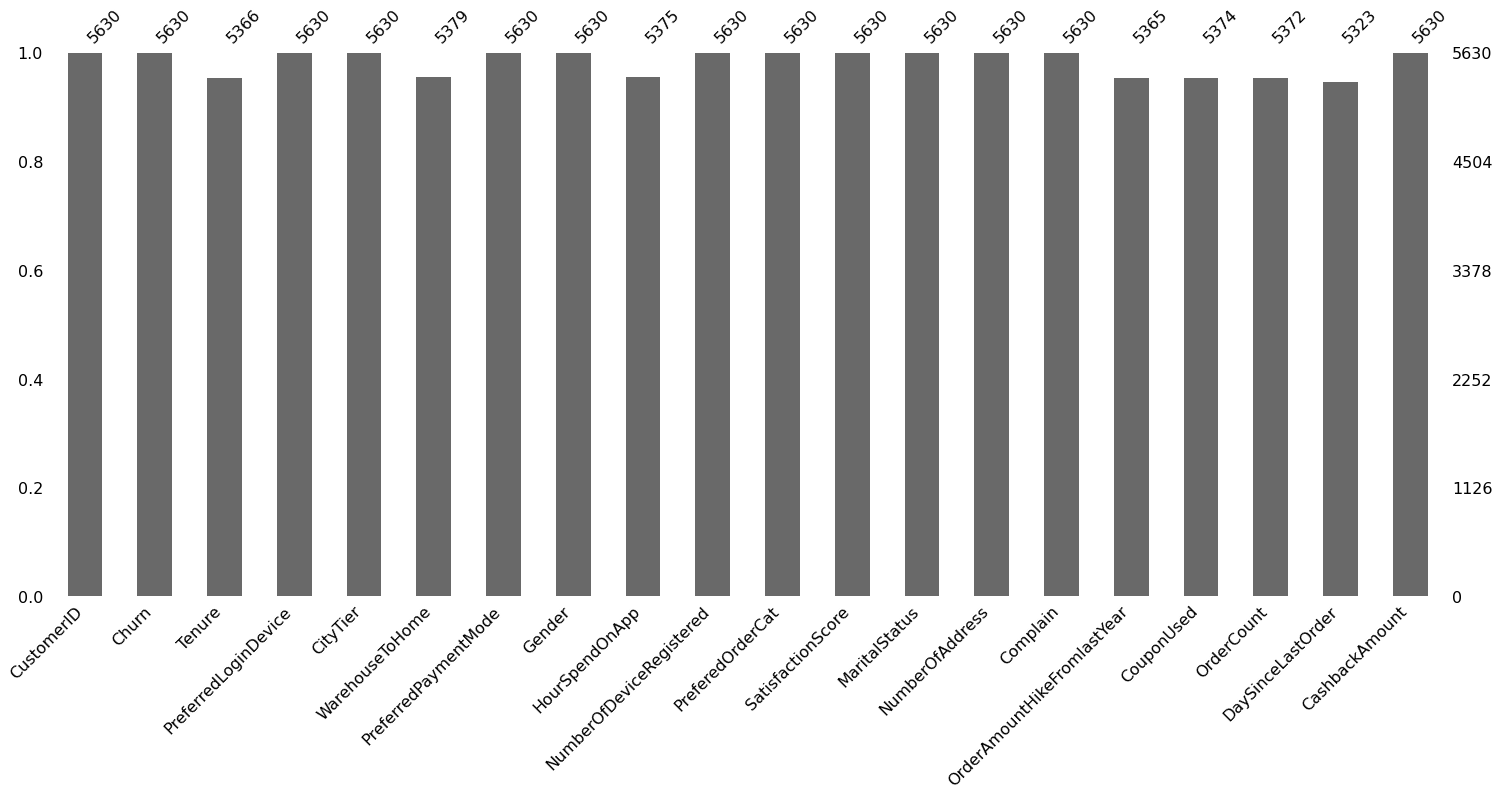

In [9]:
msno.bar(df)

In [10]:
df.duplicated().sum()

0

In [11]:
for i in df.columns:
    if df[i].dtypes == 'object':
        print(i)
        print()
        print('the values are:') 
        print(df[i].value_counts())
        print()
        print()
        
    

PreferredLoginDevice

the values are:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64


PreferredPaymentMode

the values are:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64


Gender

the values are:
Male      3384
Female    2246
Name: Gender, dtype: int64


PreferedOrderCat

the values are:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64


MaritalStatus

the values are:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64




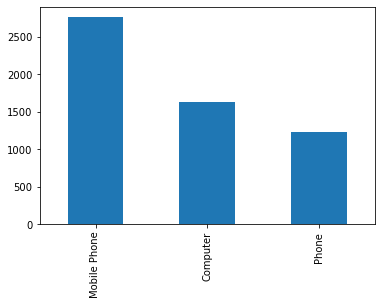

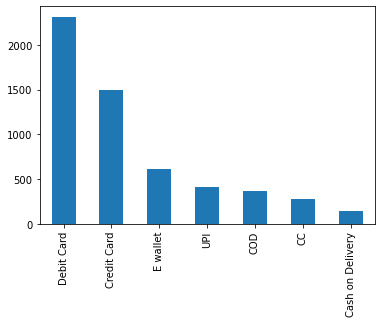

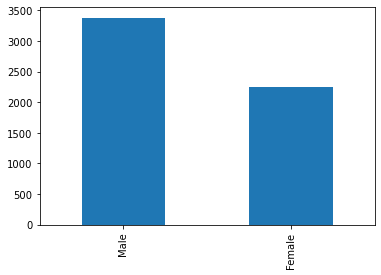

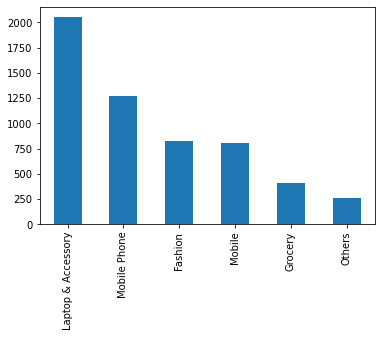

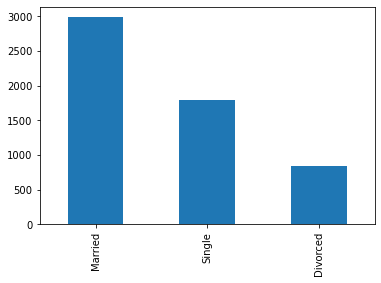

In [12]:
# Data in visualization format

for i in df.columns:
    if df[i].dtypes == 'object':
        df[i].value_counts().plot(kind="bar")
    plt.show()

### 1.4 Cleaning data

#### Missing Values Treatment

In [13]:
df1=df.copy()

In [14]:
df.drop(['CustomerID'],axis=1, inplace=True)

In [15]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [16]:
df['Churn'] = df['Churn'].astype('object')
df['CityTier'] = df['CityTier'].astype('object')

In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.00,15.00,18.0000,26.00
CouponUsed,5374.0,1.751023,1.894621,0.0,1.00,1.00,2.0000,16.00
OrderCount,5372.0,3.008004,2.939680,1.0,1.00,2.00,3.0000,16.00


In [18]:
df.median()

Churn                            0.00
Tenure                           9.00
CityTier                         1.00
WarehouseToHome                 14.00
HourSpendOnApp                   3.00
NumberOfDeviceRegistered         4.00
SatisfactionScore                3.00
NumberOfAddress                  3.00
Complain                         0.00
OrderAmountHikeFromlastYear     15.00
CouponUsed                       1.00
OrderCount                       2.00
DaySinceLastOrder                3.00
CashbackAmount                 163.28
dtype: float64

In [19]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        df[i].fillna(df[i].median(),inplace=True)

In [20]:
df.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

#### Outlier Treatment

<AxesSubplot:>

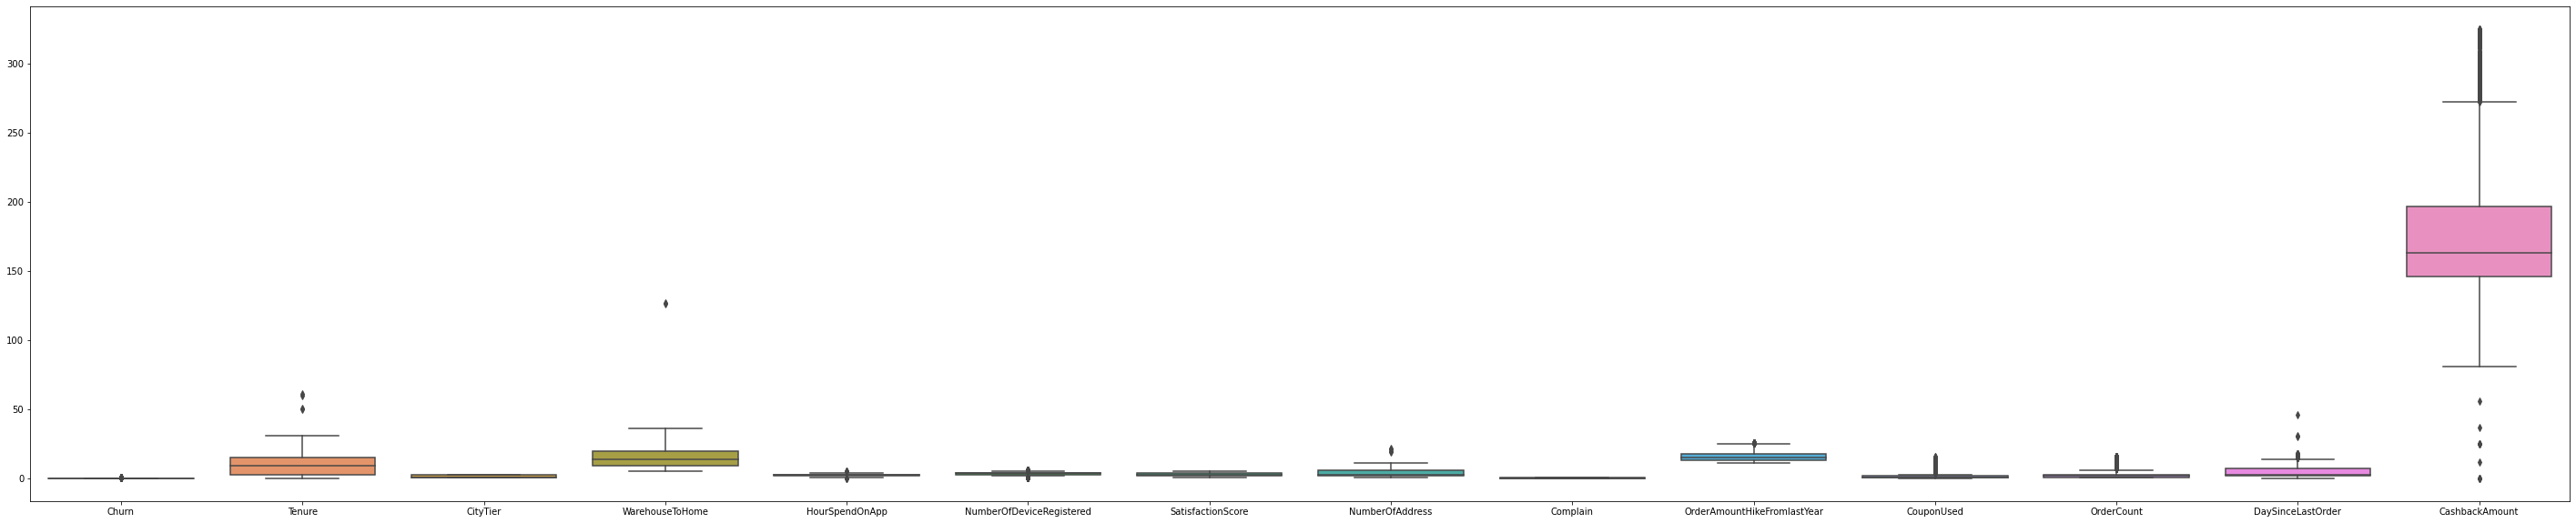

In [21]:
plt.figure(figsize=(50,10))
sns.boxplot(data=df)

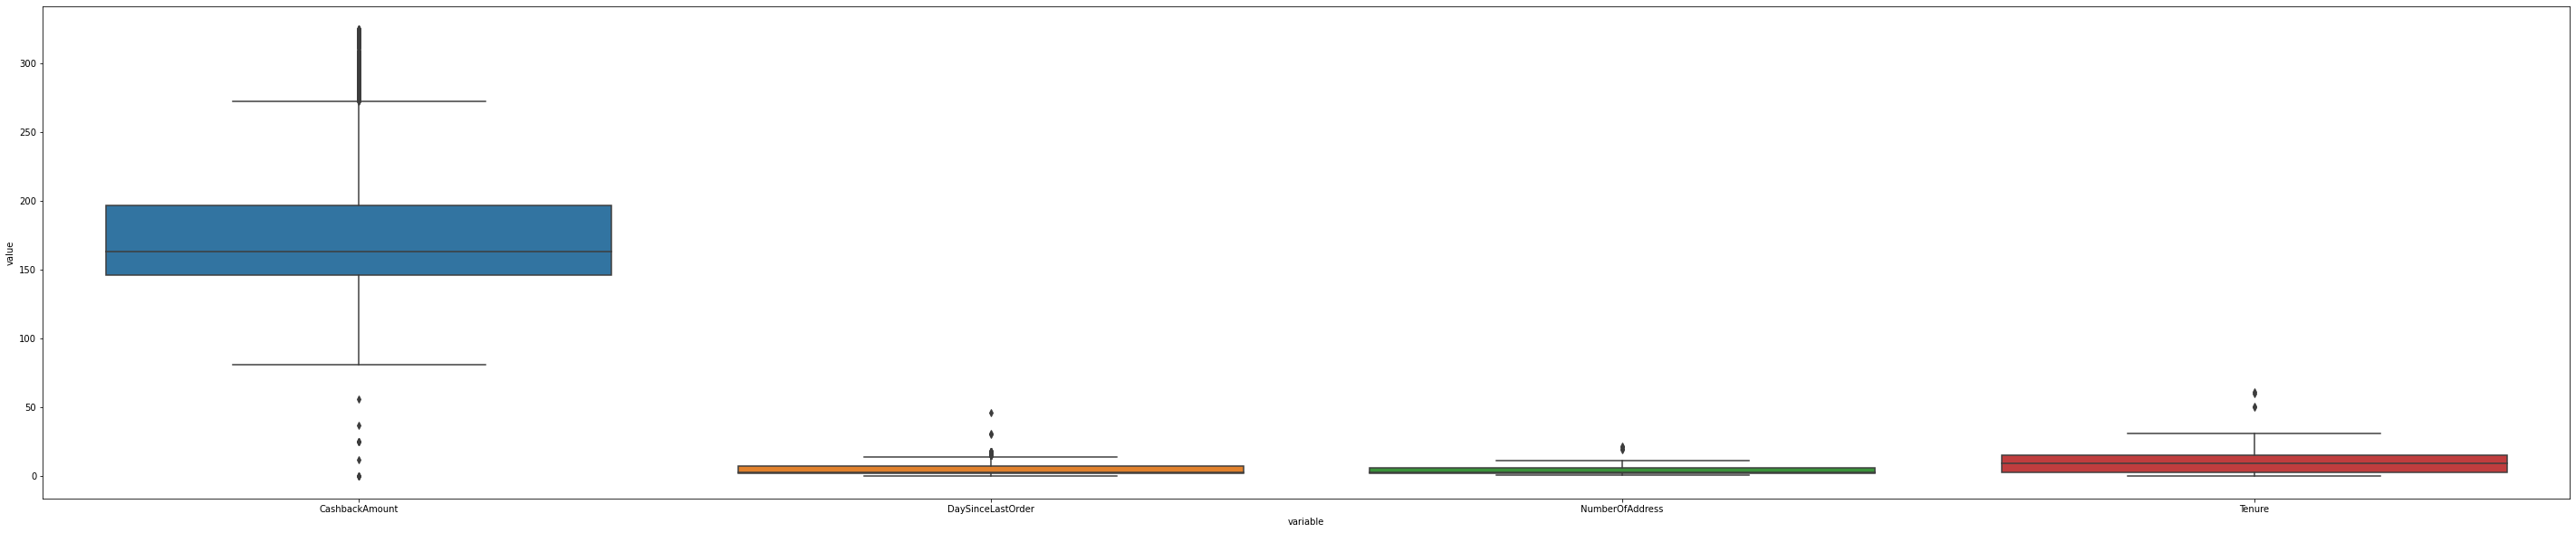

In [22]:
plt.figure(figsize=(50,10))
df_plot=pd.DataFrame(data =df, columns = ['CashbackAmount','DaySinceLastOrder','NumberOfAddress','Tenure'])
sns.boxplot(x="variable", y="value", data=pd.melt(df_plot))
plt.show()


In [23]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    return lr, ur

In [24]:
df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [25]:
for column in df.columns:
    if df[column].dtype != 'object': 
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])

## 2. Feature Engineering

Add new feature called 'Average Cashback per order'

In [26]:
df['Avg_cashback per rder'] = df['CashbackAmount'] / df['OrderCount']

In [27]:
Churn_percent = round((df['Churn'][df['Churn']==1].count()*100/df['Churn'].count()),2)
print('The Average churner is',Churn_percent)

The Average churner is 16.84


In [28]:
Churn_percent = round((df['Churn'][df['Churn']==0].count()*100/df['Churn'].count()),2)
print('The Average Customer Not Churn is',Churn_percent)

The Average Customer Not Churn is 83.16


In [29]:
df

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Avg_cashback per rder
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3.0,Laptop & Accessory,2.0,Single,9.0,1.0,11.0,1.0,1.0,5.0,159.93,159.930
1,1,9.0,Phone,1,8.0,UPI,Male,3.0,4.0,Mobile,3.0,Single,7.0,1.0,15.0,0.0,1.0,0.0,120.90,120.900
2,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4.0,Mobile,3.0,Single,6.0,1.0,14.0,0.0,1.0,3.0,120.28,120.280
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4.0,Laptop & Accessory,5.0,Single,8.0,0.0,23.0,0.0,1.0,3.0,134.07,134.070
4,1,0.0,Phone,1,12.0,CC,Male,3.0,3.0,Mobile,5.0,Single,3.0,0.0,11.0,1.0,1.0,3.0,129.60,129.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2.0,Laptop & Accessory,1.0,Married,6.0,0.0,18.0,1.0,2.0,4.0,150.71,75.355
5626,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5.0,Fashion,5.0,Married,6.0,0.0,16.0,1.0,2.0,3.0,224.91,112.455
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2.0,Laptop & Accessory,4.0,Married,3.0,1.0,21.0,1.0,2.0,4.0,186.42,93.210
5628,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5.0,Laptop & Accessory,4.0,Married,4.0,0.0,15.0,2.0,2.0,9.0,178.90,89.450


## 3. Exploratory Data Analysis

### 3.1 Univariate Analysis

In [30]:
category=[]
numeric=[]
for i in df.columns:
    if df[i].dtype=='object':
        category.append(i)
    else:
        numeric.append(i)
print('+ category = ',category)
print('+ numeric= ',numeric)

+ category =  ['Churn', 'PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
+ numeric=  ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'Avg_cashback per rder']


In [31]:
df[category].describe().T

,count,unique,top,freq
Churn,5630,2,0,4682
PreferredLoginDevice,5630,3,Mobile Phone,2765
CityTier,5630,3,1,3666
PreferredPaymentMode,5630,7,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,6,Laptop & Accessory,2050
MaritalStatus,5630,3,Married,2986


In [32]:
df[numeric].describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5630.0,10.118117,8.291334,0.000000,3.000000,9.00,15.0000,33.00000
WarehouseToHome,5630.0,15.534813,8.089328,5.000000,9.000000,14.00,20.0000,36.50000
HourSpendOnApp,5630.0,2.934636,0.703826,0.500000,2.000000,3.00,3.0000,4.50000
NumberOfDeviceRegistered,5630.0,3.695471,0.942015,1.500000,3.000000,4.00,4.0000,5.50000
SatisfactionScore,5630.0,3.066785,1.380194,1.000000,2.000000,3.00,4.0000,5.00000
NumberOfAddress,5630.0,4.207993,2.555111,1.000000,2.000000,3.00,6.0000,12.00000
Complain,5630.0,0.284902,0.451408,0.000000,0.000000,0.00,1.0000,1.00000
OrderAmountHikeFromlastYear,5630.0,15.671670,3.582823,11.000000,13.000000,15.00,18.0000,25.50000
CouponUsed,5630.0,1.440409,1.071295,0.000000,1.000000,1.00,2.0000,3.50000
OrderCount,5630.0,2.520604,1.711109,1.000000,1.000000,2.00,3.0000,6.00000


In [33]:
for i in category:
    print(i)
    print(df[i].value_counts())
    print()
    print()

Churn
0    4682
1     948
Name: Churn, dtype: int64


PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64


CityTier
1    3666
3    1722
2     242
Name: CityTier, dtype: int64


PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64


Gender
Male      3384
Female    2246
Name: Gender, dtype: int64


PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64


MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64




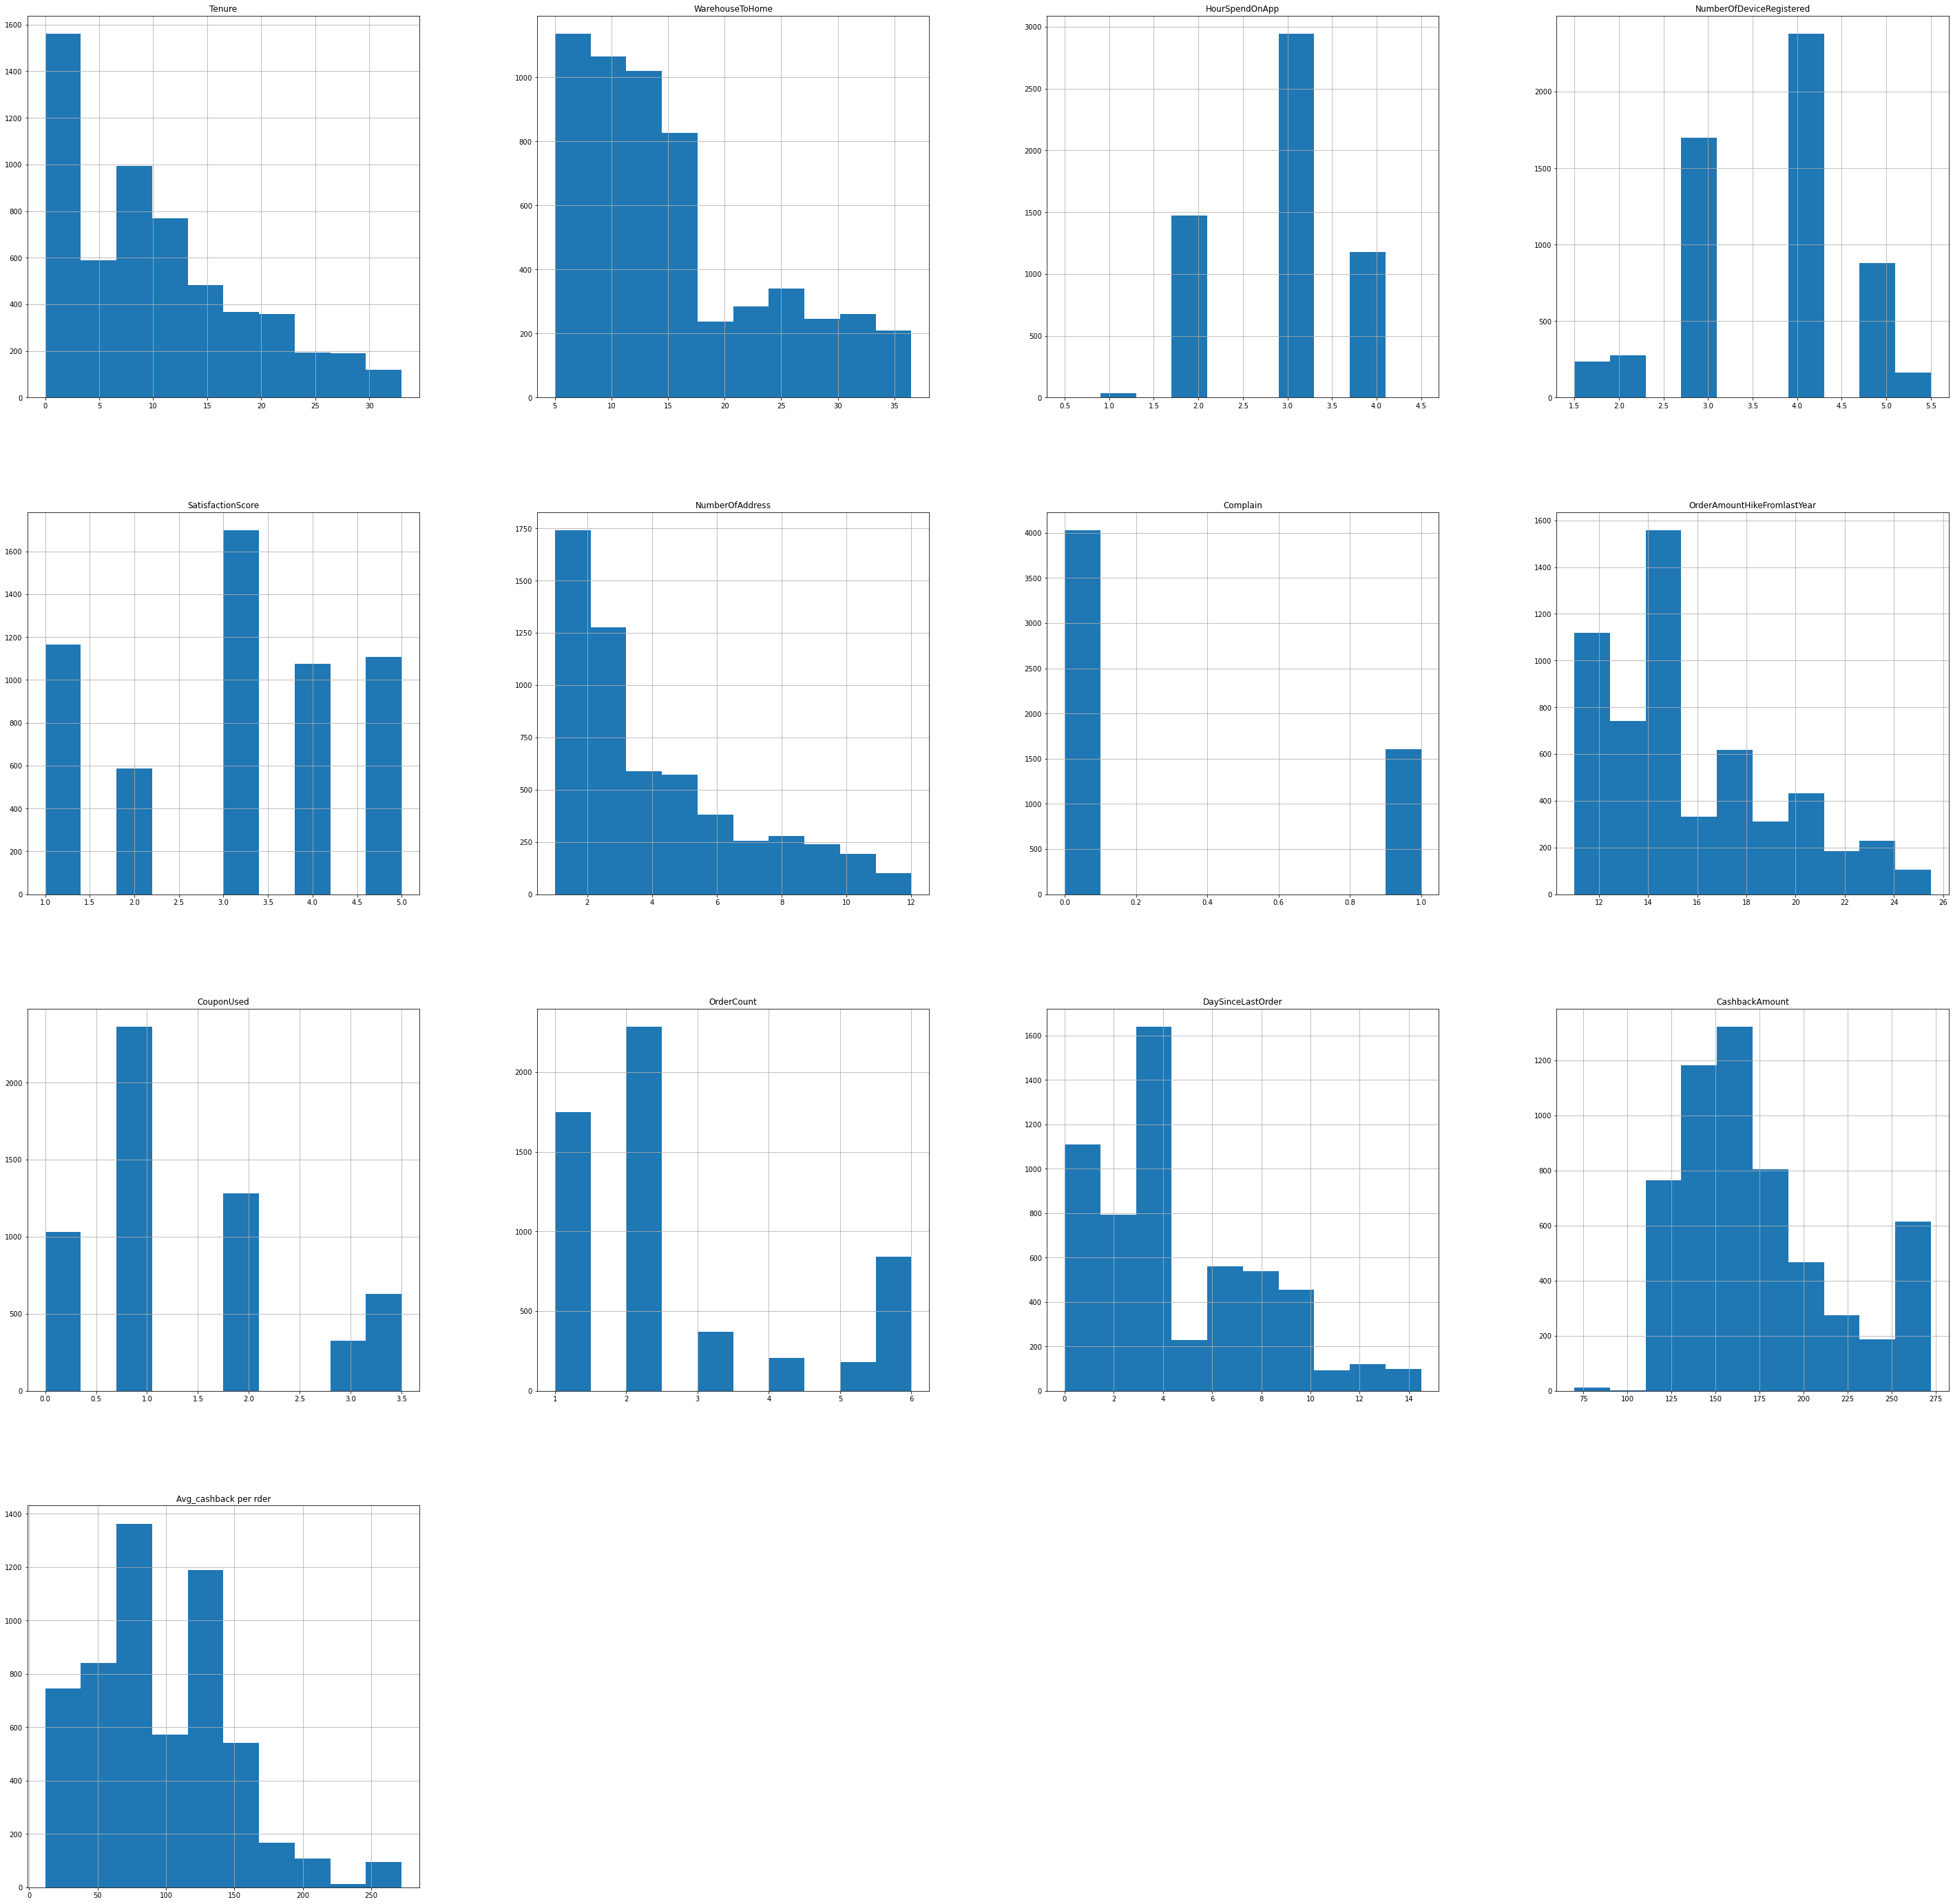

In [34]:
df[numeric].hist(figsize=(50,50))
plt.style.use('default')


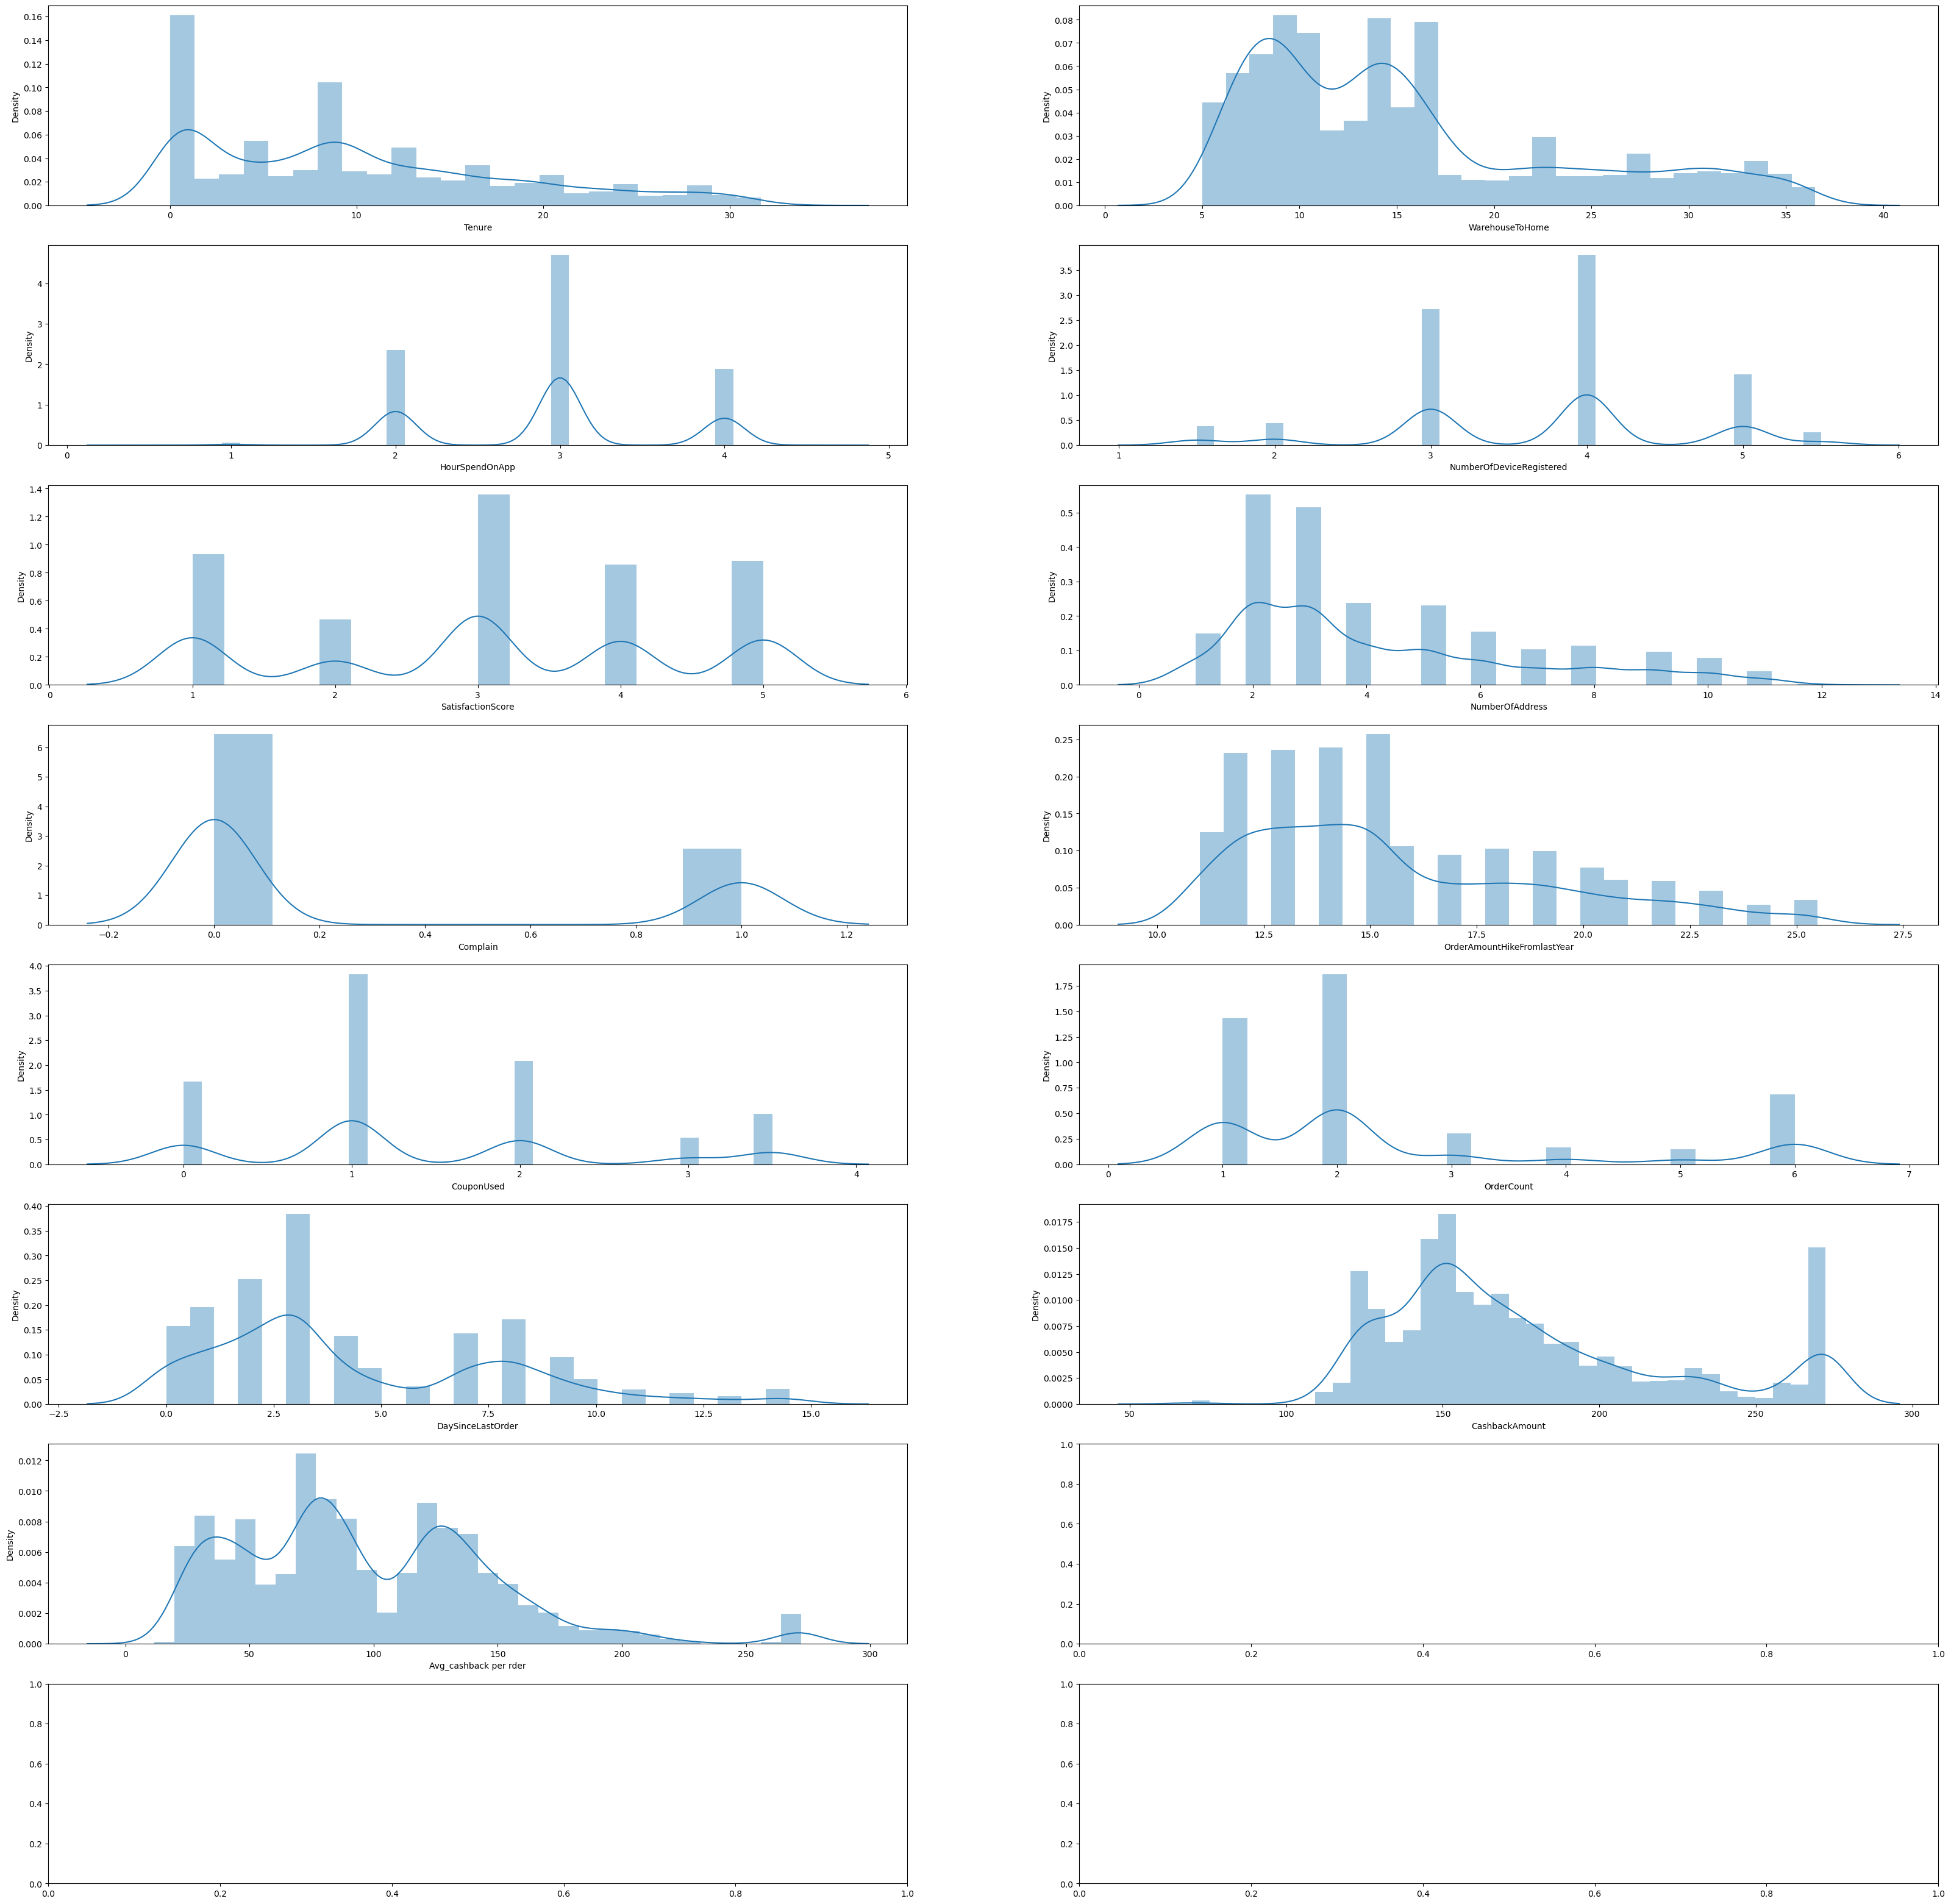

In [35]:
fig, ax = plt.subplots(8, 2, figsize=(40, 40))
for i, subplot in zip(numeric, ax.flatten()):
    sns.distplot(df[i], ax=subplot)

#### Defining a tuple for storing the dataframes in a containing information about the contribution each value to the customer churn.this was done so that we can quickly automate making such dataframes



In [36]:
d={}


In [37]:
for i in df.columns:
    d[i] = pd.concat([df.groupby(i).Churn.sum(),df[i].value_counts(),df.groupby(i).Churn.sum()*100/df[i].value_counts()], axis=1)
    d[i].reset_index(level=0,inplace=True)
    d[i] = d[i].rename(columns = {'index':i, 'Churn':'Customers_churned', i:'Total_Customers', 0:'perc_of_total_cust'})

#### EDA - Univariate Analysis - Analysing Churn by each Variable

In [38]:

for i in df.columns:
    print(i)
    print(round(d[i],2))
    print()

Churn
   Churn Total_Customers Total_Customers Total_Customers
0      0               0            4682             0.0
1      1             948             948           100.0

Tenure
    Tenure Customers_churned  Total_Customers perc_of_total_cust
0      0.0               272              508          53.543307
1      1.0               349              690           50.57971
2      2.0                14              167           8.383234
3      3.0                18              195           9.230769
4      4.0                20              203           9.852217
5      5.0                16              204           7.843137
6      6.0                 8              183           4.371585
7      7.0                16              221           7.239819
8      8.0                16              263            6.08365
9      9.0                93              511          18.199609
10    10.0                14              213            6.57277
11    11.0                10       

      Avg_cashback per rder Customers_churned  Total_Customers  \
0                     11.64                 0                5   
1                     13.97                 0                1   
2                     20.02                 0                2   
3                     20.04                 2                2   
4                     20.15                 0                2   
...                     ...               ...              ...   
2576                 267.99                 0                2   
2577                 268.56                 0                2   
2578                 268.80                 0                2   
2579                 271.59                 0                2   
2580                 272.33                 4               73   

     perc_of_total_cust  
0                   0.0  
1                   0.0  
2                   0.0  
3                 100.0  
4                   0.0  
...                 ...  
2576                0.0  

#### Visualization of each variable

In [39]:
def analysis_chart(variable):
    plt.figure(figsize=(20,12))
    fig, ax = plt.subplots()
    title1 = 'Customers Churn analysed by ' + variable
    plt.title(title1)
    line1 = ax.plot(d[variable][variable],d[variable]['Customers_churned'], color='red', label = 'Customers churned')
    line2 = ax.plot(d[variable][variable],d[variable]['Total_Customers'], color='dodgerblue', label = 'Total Customers')
    plt.xlabel (variable)
    plt.ylabel ('No. of customers')
    
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    ax2=ax.twinx()
    line3 = ax2.plot(d[variable][variable],d[variable]['perc_of_total_cust'], color='yellowgreen', label = 'Churn as Percent of total')
    y = 0*d[variable]['perc_of_total_cust']+20.25
    line4 = ax2.plot(d[variable][variable], y, color='black', label='Average customer Churn', linestyle='dashed')
    plt.ylabel ('percentage of customers churned')
    lines = line1+line2+line3+line4
    labs = [l.get_label() for l in lines]
    ax.legend(lines, labs, bbox_to_anchor=(1.7, 1))
  # adding sns palette for better visualisation
    sns.despine(ax=ax, right=True, left=True)
    sns.despine(ax=ax2, left=True, right=False)

In [40]:
col = ['Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder']

<Figure size 5000x1000 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

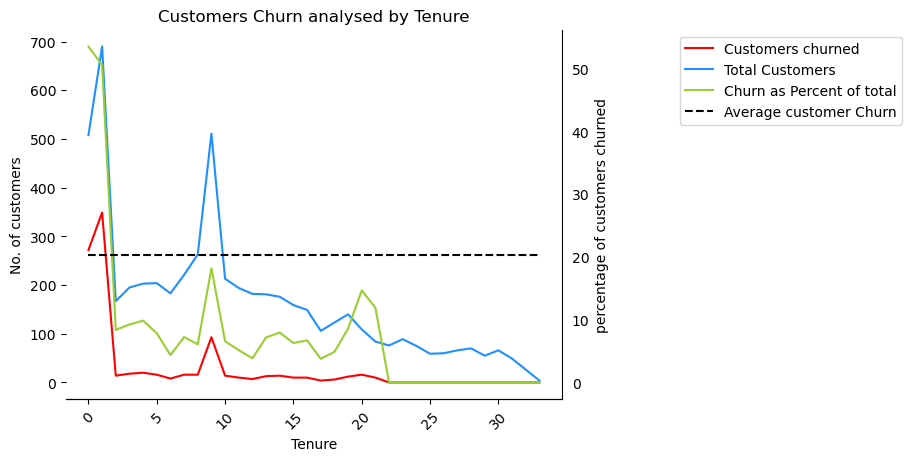

In [41]:
plt.figure(figsize=(50,10))
plt.style.use('default')
analysis_chart('Tenure')

<Figure size 2000x1200 with 0 Axes>

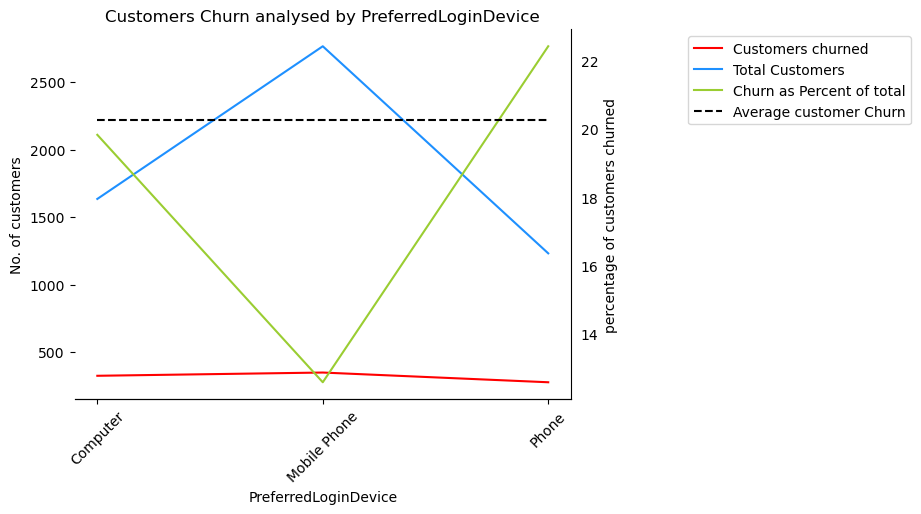

In [42]:
analysis_chart('PreferredLoginDevice')
plt.style.use('default')

<Figure size 2000x1200 with 0 Axes>

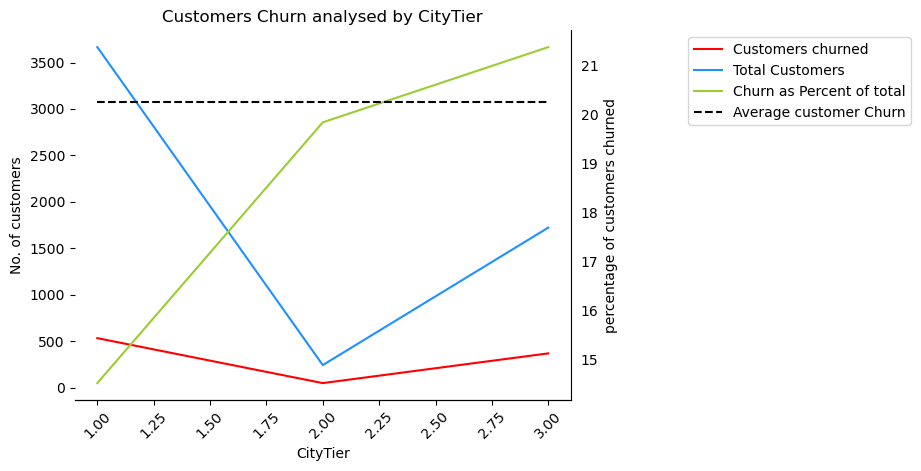

In [43]:
analysis_chart('CityTier')


<Figure size 2000x1200 with 0 Axes>

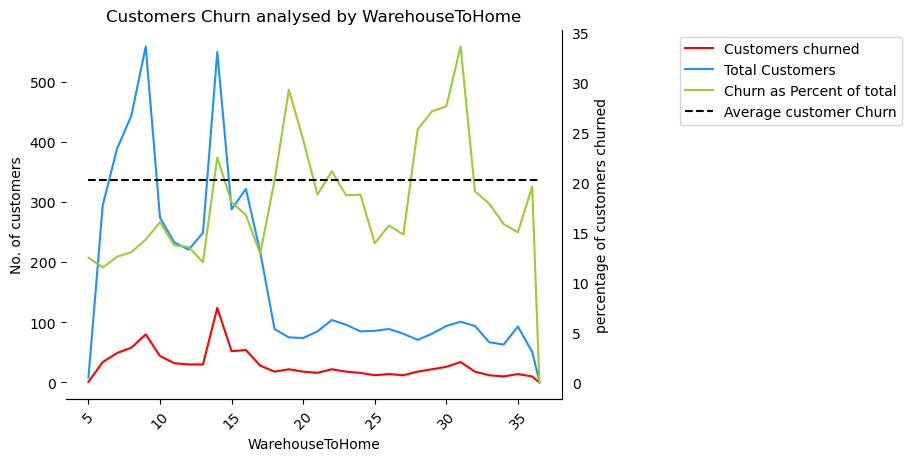

In [44]:
analysis_chart('WarehouseToHome')

<Figure size 2000x1200 with 0 Axes>

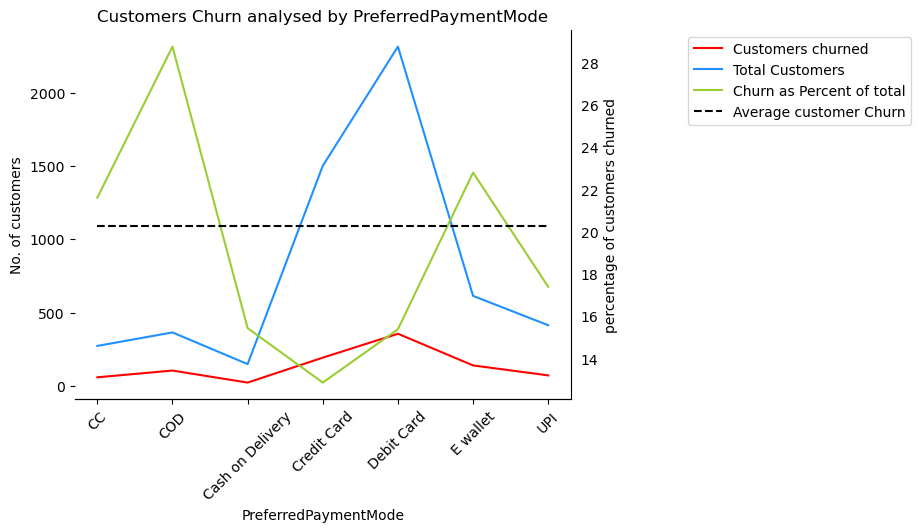

In [45]:
analysis_chart('PreferredPaymentMode')


<Figure size 2000x1200 with 0 Axes>

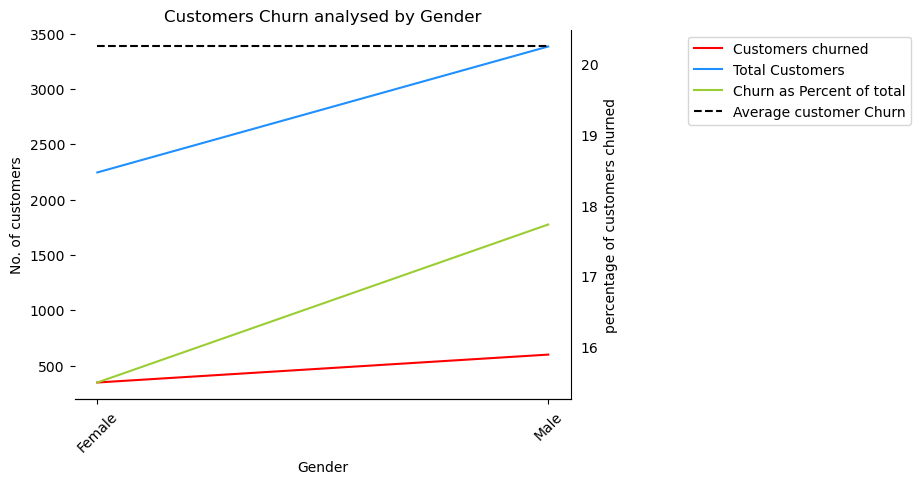

In [46]:
analysis_chart('Gender')


<Figure size 2000x1200 with 0 Axes>

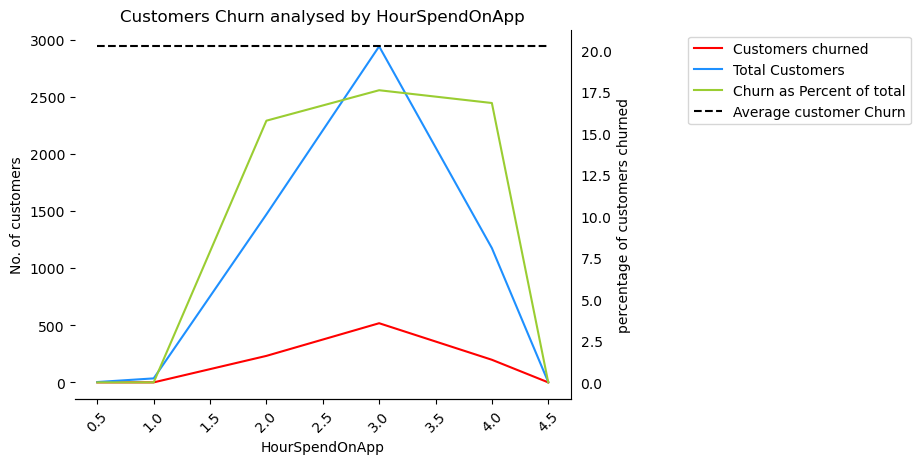

In [47]:
analysis_chart('HourSpendOnApp')


<Figure size 2000x1200 with 0 Axes>

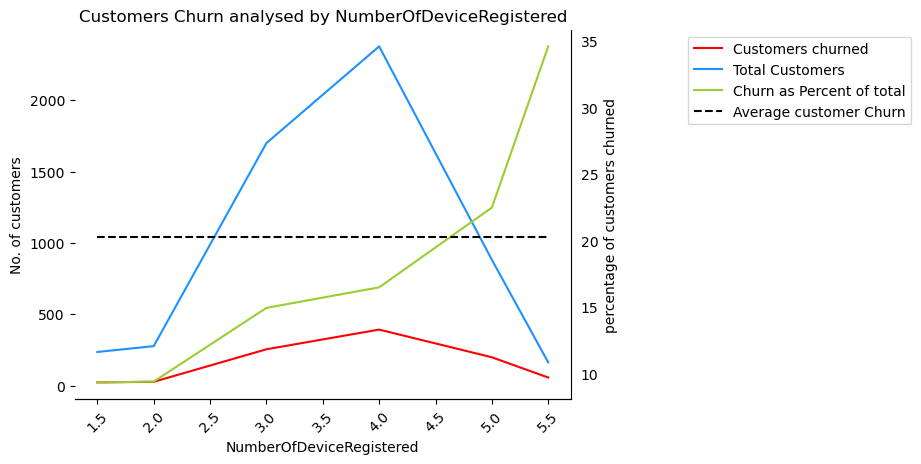

In [48]:
analysis_chart('NumberOfDeviceRegistered')


<Figure size 2000x1200 with 0 Axes>

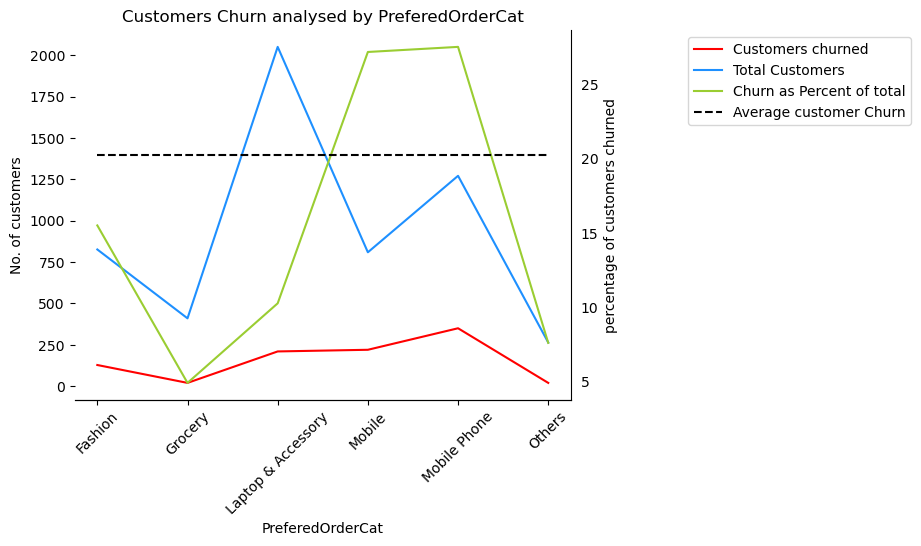

In [49]:
analysis_chart('PreferedOrderCat')


<Figure size 2000x1200 with 0 Axes>

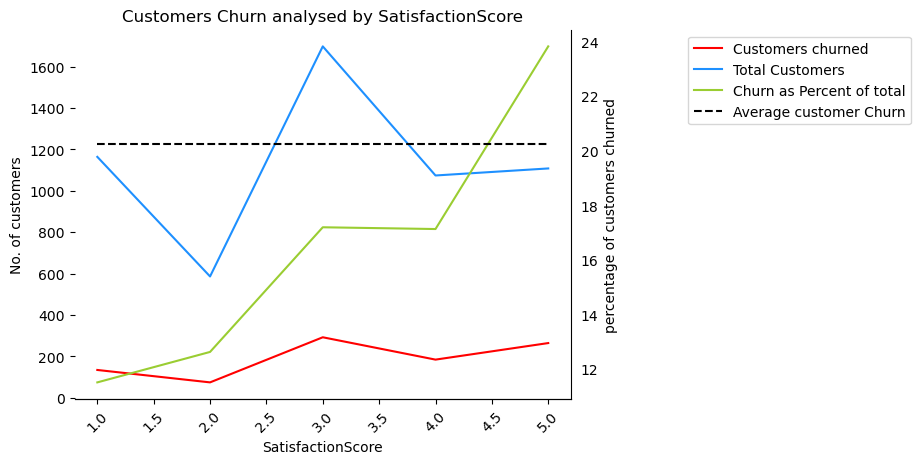

In [50]:
analysis_chart('SatisfactionScore')

<Figure size 2000x1200 with 0 Axes>

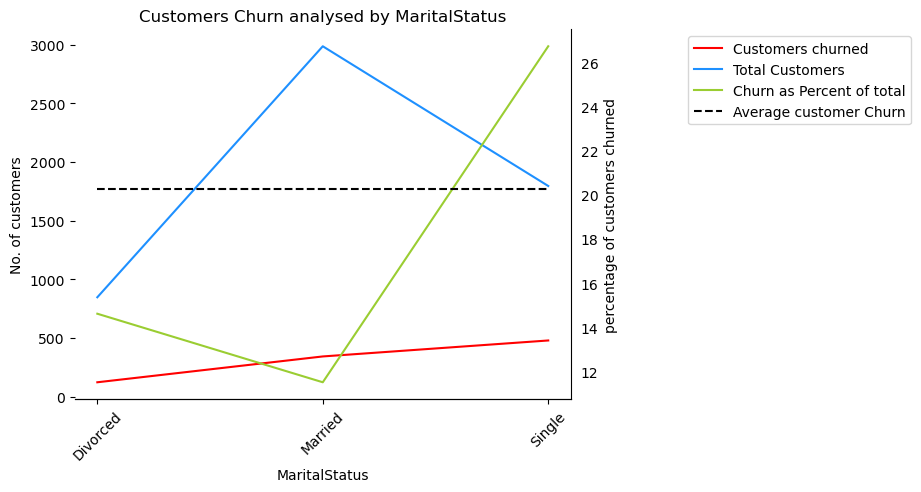

In [51]:
analysis_chart('MaritalStatus')

<Figure size 2000x1200 with 0 Axes>

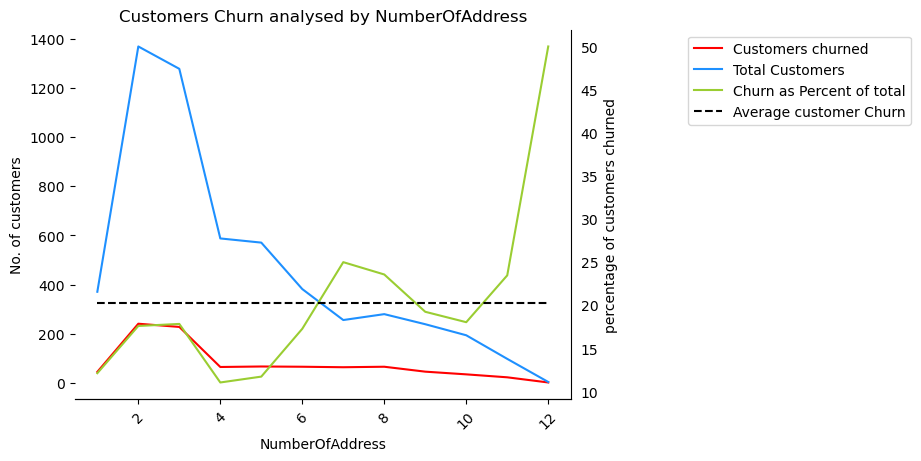

In [52]:
analysis_chart('NumberOfAddress')

<Figure size 2000x1200 with 0 Axes>

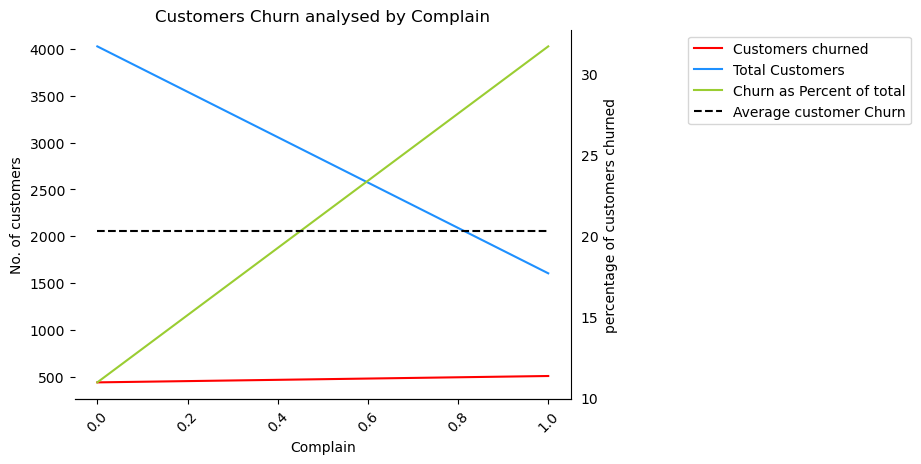

In [53]:
 analysis_chart('Complain')
       

<Figure size 2000x1200 with 0 Axes>

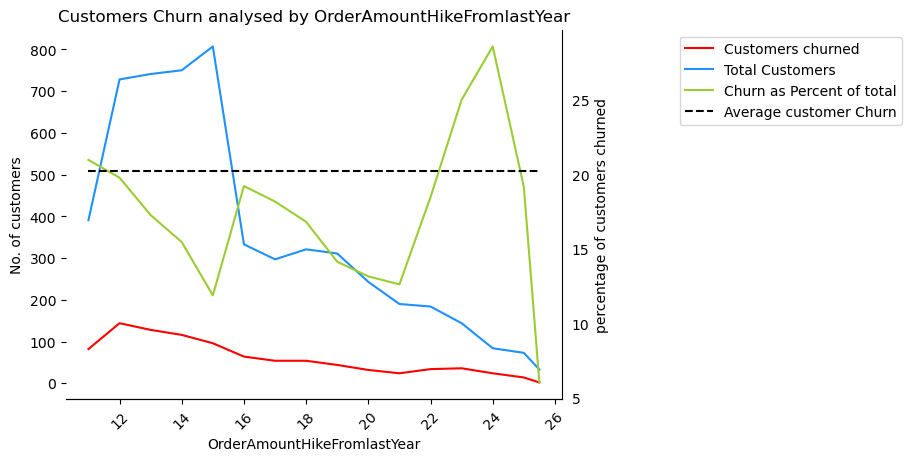

In [54]:
analysis_chart('OrderAmountHikeFromlastYear')

<Figure size 2000x1200 with 0 Axes>

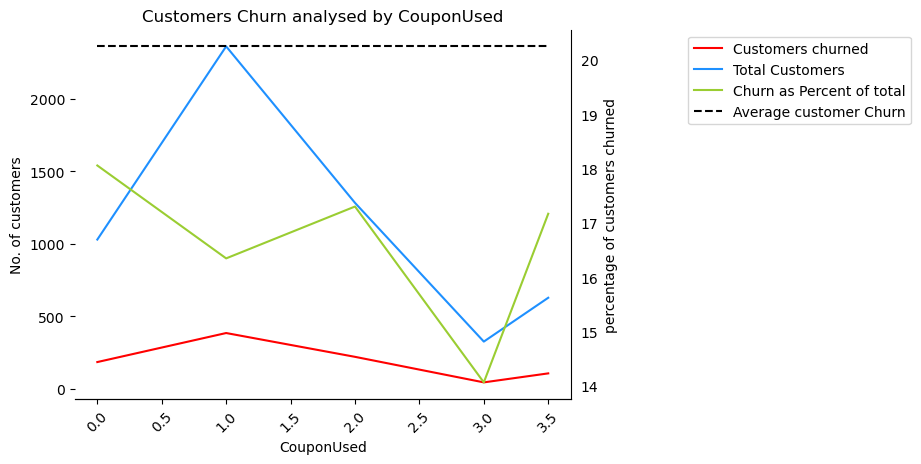

In [55]:
analysis_chart('CouponUsed')

<Figure size 2000x1200 with 0 Axes>

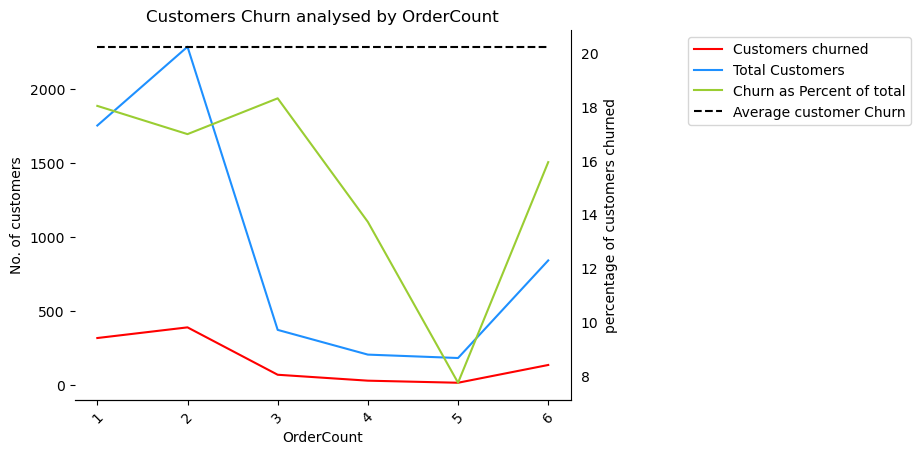

In [56]:
analysis_chart('OrderCount')

<Figure size 2000x1200 with 0 Axes>

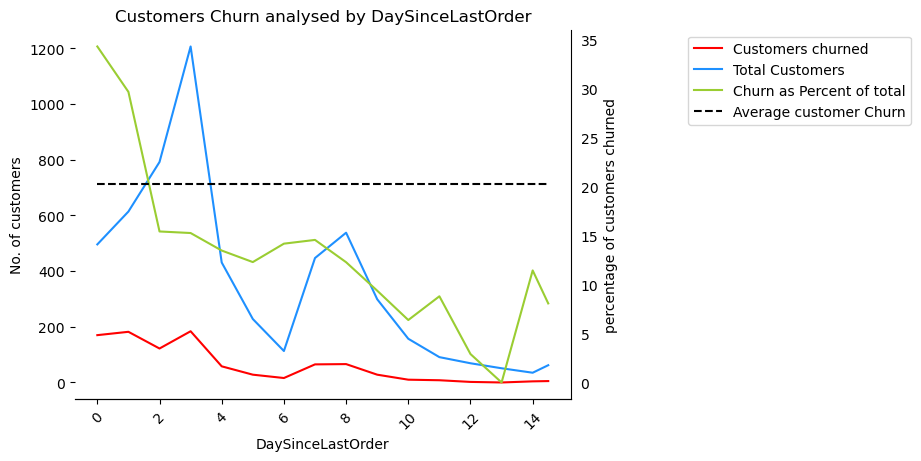

In [57]:
analysis_chart('DaySinceLastOrder')

### 3.2 Bivariate Analysis

In [58]:
df.corr()

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Avg_cashback per rder
Tenure,1.000000,-0.020914,-0.019195,-0.018833,-0.012767,0.240094,-0.022093,-0.006965,0.080694,0.138438,0.181369,0.467669,0.069088
WarehouseToHome,-0.020914,1.000000,0.068421,0.023405,0.013683,-0.006917,0.030171,0.039745,0.015066,0.006686,0.025516,0.015089,-0.018543
HourSpendOnApp,-0.019195,0.068421,1.000000,0.309324,0.030829,0.140625,0.006902,0.099769,0.270733,0.144500,0.065973,0.116313,-0.279375
NumberOfDeviceRegistered,-0.018833,0.023405,0.309324,1.000000,-0.015235,0.086399,0.002910,0.065444,0.211962,0.123723,0.007018,0.141090,-0.205855
SatisfactionScore,-0.012767,0.013683,0.030829,-0.015235,1.000000,0.054093,-0.031115,-0.027179,0.012604,0.004307,0.028225,0.003386,0.004187
NumberOfAddress,0.240094,-0.006917,0.140625,0.086399,0.054093,1.000000,-0.027512,0.010420,0.065244,-0.009940,-0.071192,0.196308,0.019662
Complain,-0.022093,0.030171,0.006902,0.002910,-0.031115,-0.027512,1.000000,-0.003884,-0.006949,-0.017721,-0.039401,0.003043,0.017125
OrderAmountHikeFromlastYear,-0.006965,0.039745,0.099769,0.065444,-0.027179,0.010420,-0.003884,1.000000,0.057339,0.016846,-0.002469,-0.002707,-0.059495
CouponUsed,0.080694,0.015066,0.270733,0.211962,0.012604,0.065244,-0.006949,0.057339,1.000000,0.650738,0.300646,0.229291,-0.577900
OrderCount,0.138438,0.006686,0.144500,0.123723,0.004307,-0.009940,-0.017721,0.016846,0.650738,1.000000,0.452753,0.293279,-0.779481


Text(0.5, 1.0, 'Correlation Heatmap')

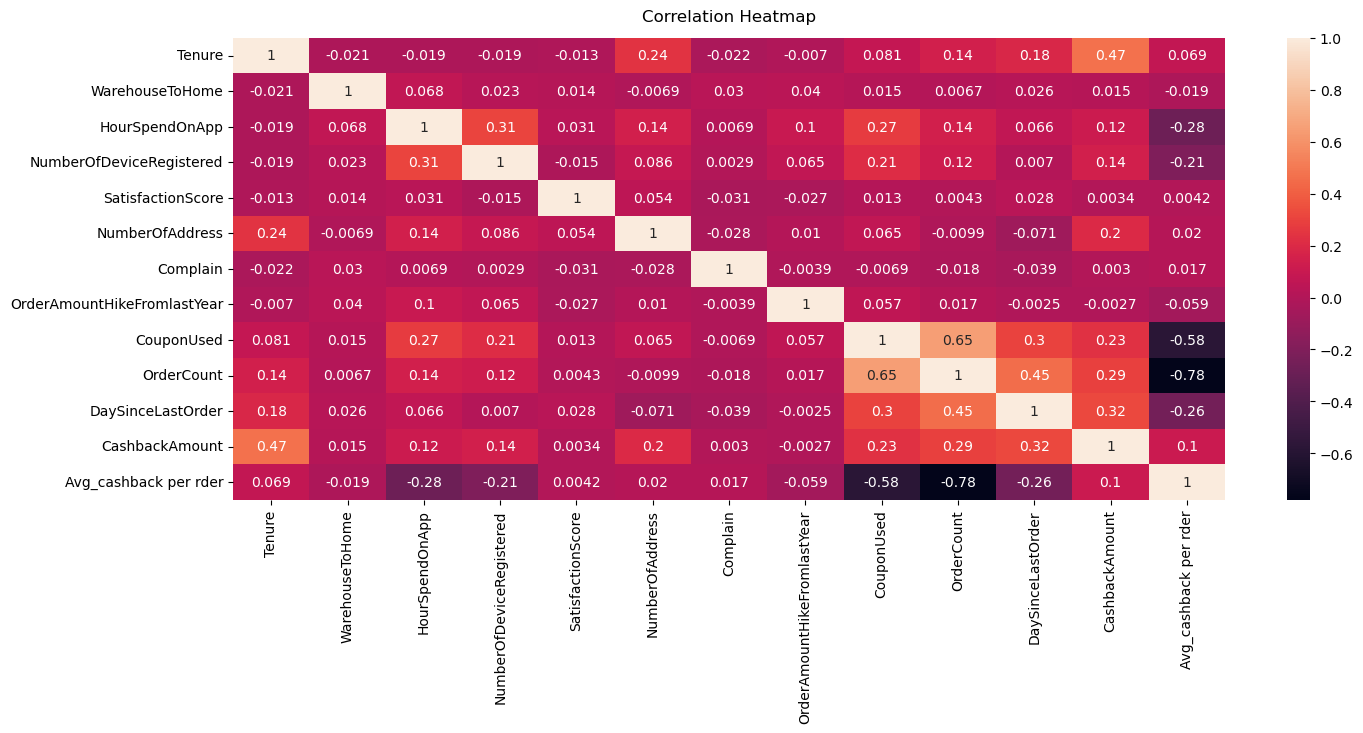

In [59]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(),annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

### 3.3 Scaling data

In [60]:
df_encoded=df.copy()
df_encoded.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Avg_cashback per rder
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3.0,Laptop & Accessory,2.0,Single,9.0,1.0,11.0,1.0,1.0,5.0,159.93,159.93
1,1,9.0,Phone,1,8.0,UPI,Male,3.0,4.0,Mobile,3.0,Single,7.0,1.0,15.0,0.0,1.0,0.0,120.90,120.90
2,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4.0,Mobile,3.0,Single,6.0,1.0,14.0,0.0,1.0,3.0,120.28,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4.0,Laptop & Accessory,5.0,Single,8.0,0.0,23.0,0.0,1.0,3.0,134.07,134.07
4,1,0.0,Phone,1,12.0,CC,Male,3.0,3.0,Mobile,5.0,Single,3.0,0.0,11.0,1.0,1.0,3.0,129.60,129.60


In [61]:
df_encoded = pd.get_dummies(df_encoded,drop_first=True)

In [62]:
df_encoded.head()

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,4.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,1
1,9.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,0.0,1.0,...,0,1,1,0,0,1,0,0,0,1
2,9.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,0.0,1.0,...,0,0,1,0,0,1,0,0,0,1
3,0.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,0.0,1.0,...,0,0,1,0,1,0,0,0,0,1
4,0.0,12.0,3.0,3.0,5.0,3.0,0.0,11.0,1.0,1.0,...,0,0,1,0,0,1,0,0,0,1


#### Defining a function standard scaler that will scale the the dataframe

In [63]:
scaler = StandardScaler()

In [64]:
features = df_encoded[numeric]
features = scaler.fit_transform(features)


In [65]:
scaled_df_encoded = df_encoded.copy()
scaled_df_encoded[numeric] = features
scaled_df_encoded

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,-0.737959,-1.178795,0.092878,-0.738345,-0.772992,1.875626,1.584290,-1.304023,-0.411136,-0.888745,...,0,0,0,0,1,0,0,0,0,1
1,-0.134866,-0.931534,0.092878,0.323303,-0.048392,1.092812,1.584290,-0.187486,-1.344668,-0.888745,...,0,1,1,0,0,1,0,0,0,1
2,-0.134866,1.788340,-1.328053,0.323303,-0.048392,0.701405,1.584290,-0.466620,-1.344668,-0.888745,...,0,0,1,0,0,1,0,0,0,1
3,-1.220433,-0.066119,-1.328053,0.323303,1.400807,1.484219,-0.631198,2.045589,-1.344668,-0.888745,...,0,0,1,0,1,0,0,0,0,1
4,-1.220433,-0.437011,0.092878,-0.738345,1.400807,-0.472817,-0.631198,-1.304023,-0.411136,-0.888745,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,-0.014247,1.788340,0.092878,-1.799993,-1.497592,0.701405,-0.631198,0.649917,-0.411136,-0.304276,...,0,0,1,0,1,0,0,0,1,0
5626,0.347609,-0.313381,0.092878,1.384951,1.400807,0.701405,-0.631198,0.091648,-0.411136,-0.304276,...,0,0,1,0,0,0,0,0,1,0
5627,-1.099814,-0.560642,0.092878,-1.799993,0.676207,-0.472817,1.584290,1.487320,-0.411136,-0.304276,...,0,0,1,0,1,0,0,0,1,0
5628,1.553794,-0.807903,1.513809,1.384951,0.676207,-0.081410,-0.631198,-0.187486,0.522397,-0.304276,...,0,0,1,0,1,0,0,0,1,0


In [66]:
#Features are selected
scaled_df_encoded.columns.values

array(['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed',
       'OrderCount', 'DaySinceLastOrder', 'CashbackAmount',
       'Avg_cashback per rder', 'Churn_1',
       'PreferredLoginDevice_Mobile Phone', 'PreferredLoginDevice_Phone',
       'CityTier_2', 'CityTier_3', 'PreferredPaymentMode_COD',
       'PreferredPaymentMode_Cash on Delivery',
       'PreferredPaymentMode_Credit Card',
       'PreferredPaymentMode_Debit Card', 'PreferredPaymentMode_E wallet',
       'PreferredPaymentMode_UPI', 'Gender_Male',
       'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory',
       'PreferedOrderCat_Mobile', 'PreferedOrderCat_Mobile Phone',
       'PreferedOrderCat_Others', 'MaritalStatus_Married',
       'MaritalStatus_Single'], dtype=object)

### 4. Model Buiding

#### 4.1 Logistics Regression

Over-sampling using SMOTE

In [67]:
X=scaled_df_encoded.drop(['Churn_1'],axis=1)
y=scaled_df_encoded['Churn_1']

In [68]:
print('Before OverSampling, the shape of X: {}'.format(X.shape)) 
print('Before OverSampling, the shape of y: {} \n'.format(y.shape)) 
  
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1))) 
print("Before OverSampling, counts of label '0': {}".format(sum(y == 0)))

Before OverSampling, the shape of X: (5630, 31)
Before OverSampling, the shape of y: (5630,) 

Before OverSampling, counts of label '1': 948
Before OverSampling, counts of label '0': 4682


In [69]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=1)
X_res, y_res = sm.fit_resample(X, y.ravel())

In [70]:
print('After OverSampling, the shape of X: {}'.format(X_res.shape)) 
print('After OverSampling, the shape of y: {} \n'.format(y_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0)))

After OverSampling, the shape of X: (9364, 31)
After OverSampling, the shape of y: (9364,) 

After OverSampling, counts of label '1': 4682
After OverSampling, counts of label '0': 4682


In [71]:
X_res=pd.DataFrame(X_res)
#Renaming column name of Target variable
y_res=pd.DataFrame(y_res)
y_res.columns = ['Churn_1']
scaled_df_encoded_smote = pd.concat([X_res,y_res], axis=1)

##### Train Test Split

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X = scaled_df_encoded_smote.drop(['Churn_1'],axis=1)
y = scaled_df_encoded_smote['Churn_1']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.80, random_state=1)

#### Model building

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [75]:
model_log_r = LogisticRegression()
model_log_r.fit(X_train, y_train)

LogisticRegression()

In [76]:
ytrain_predict = model_log_r.predict(X_train)
ytest_predict = model_log_r.predict(X_test)

In [77]:
ytest_predict_prob=model_log_r.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.255936,0.744064
1,0.068194,0.931806
2,0.962977,0.037023
3,0.987761,0.012239
4,0.848828,0.151172


In [78]:
model_log_r.score(X_train, y_train)   

0.8436790815645441

AUC: 0.923


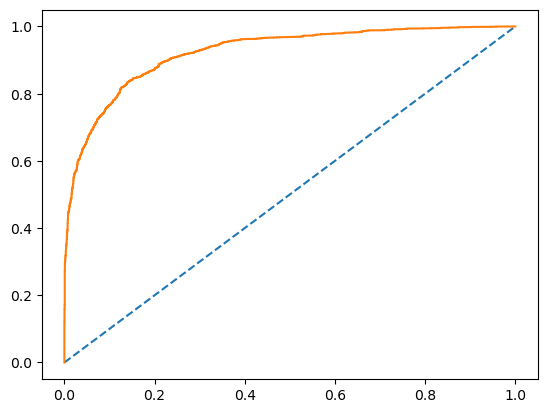

In [79]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
# predict probabilities
probs = model_log_r.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)

<AxesSubplot:>

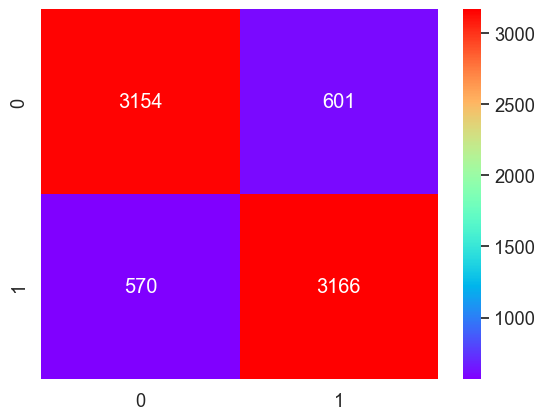

In [80]:
#confusion matrix training Data
cm_lr = confusion_matrix(y_train, ytrain_predict)
cm_lr
sns.set(font_scale = 1.2)
sns.heatmap(cm_lr,annot = True,fmt = 'd', cmap ='rainbow')

In [81]:
model_log_r.score(X_test, y_test)

0.8355579284570208

AUC: 0.923


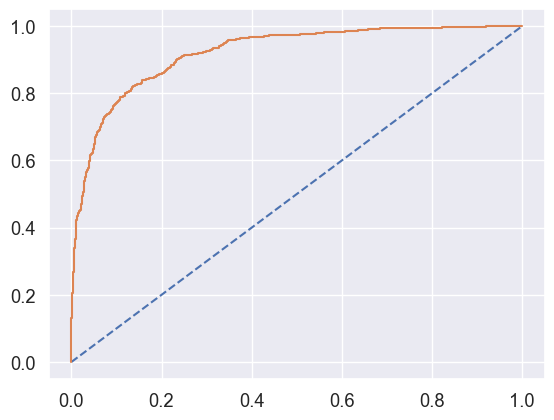

In [82]:
# predict probabilities
probs = model_log_r.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)

<AxesSubplot:>

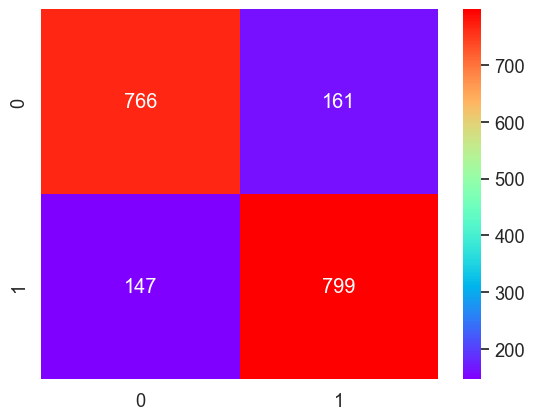

In [83]:
#confusion matrix test Data
cm_test_lr=confusion_matrix(y_test, ytest_predict)
cm_test_lr
sns.set(font_scale = 1.2)
sns.heatmap(cm_test_lr,annot = True,fmt = 'd', cmap='rainbow')

In [84]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      3755
           1       0.84      0.85      0.84      3736

    accuracy                           0.84      7491
   macro avg       0.84      0.84      0.84      7491
weighted avg       0.84      0.84      0.84      7491



#### 4.2 Decision Trees

In [85]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
DT_model= tree.DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3755
           1       1.00      1.00      1.00      3736

    accuracy                           1.00      7491
   macro avg       1.00      1.00      1.00      7491
weighted avg       1.00      1.00      1.00      7491



<AxesSubplot:>

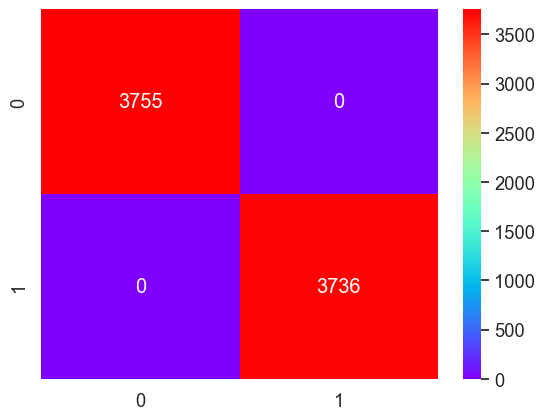

In [86]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print(model_score)
print(metrics.classification_report(y_train, y_train_predict))
#confusion matrix training Data
cm_train_dt = confusion_matrix(y_train, y_train_predict)
sns.set(font_scale = 1.2)
sns.heatmap(cm_train_dt, annot = True,fmt = 'd', cmap='rainbow')

0.9567538707955152
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       927
           1       0.95      0.96      0.96       946

    accuracy                           0.96      1873
   macro avg       0.96      0.96      0.96      1873
weighted avg       0.96      0.96      0.96      1873

Confusion Matrix


<AxesSubplot:>

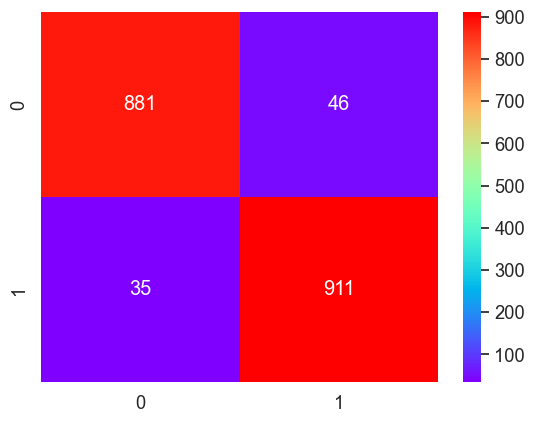

In [87]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(X_test)
model_score = DT_model.score(X_test, y_test)
print(model_score)
print(metrics.classification_report(y_test, y_test_predict))
#confusion matrix test Data
cm_test_dt = confusion_matrix(y_test, y_test_predict)
sns.set(font_scale = 1.2)
print('Confusion Matrix')
sns.heatmap(cm_test_dt, annot = True,fmt = 'd', cmap='rainbow')

AUC: 1.000


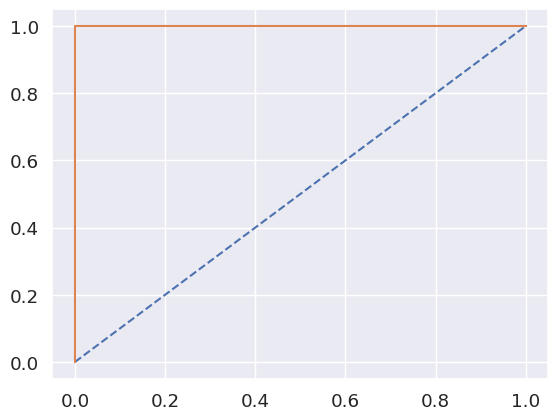

In [88]:
# predict probabilities
probs = DT_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.style.use('default')
plt.plot(train_fpr, train_tpr)

AUC: 1.000


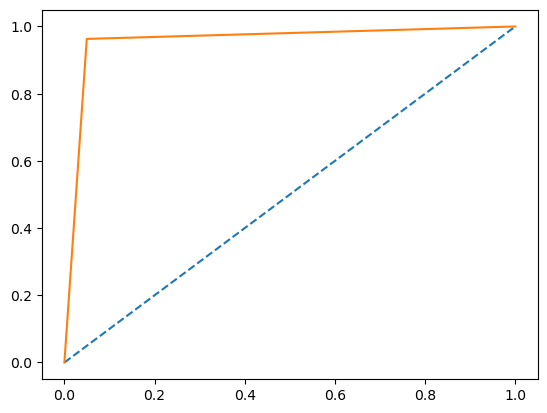

In [89]:
# predict probabilities
probs = DT_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.style.use('default')

#### 4.3 Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3755
           1       1.00      1.00      1.00      3736

    accuracy                           1.00      7491
   macro avg       1.00      1.00      1.00      7491
weighted avg       1.00      1.00      1.00      7491

Confusion Matrix


<AxesSubplot:>

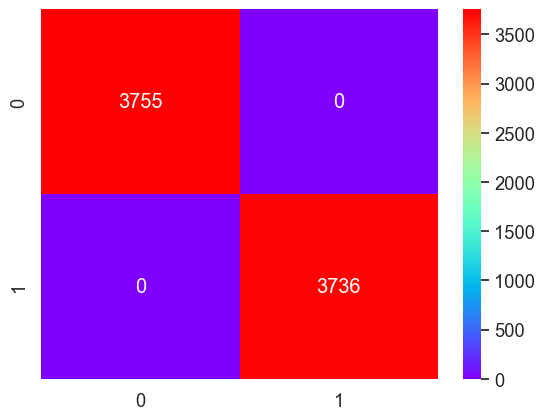

In [91]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.classification_report(y_train, y_train_predict))
#confusion matrix training Data
cm_train_rf = confusion_matrix(y_train, y_train_predict)
print('Confusion Matrix')
sns.set(font_scale = 1.2)
sns.heatmap(cm_train_rf, annot = True,fmt = 'd', cmap='rainbow')

0.981313400961025
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       927
           1       0.98      0.99      0.98       946

    accuracy                           0.98      1873
   macro avg       0.98      0.98      0.98      1873
weighted avg       0.98      0.98      0.98      1873

Confusion Matrix


<AxesSubplot:>

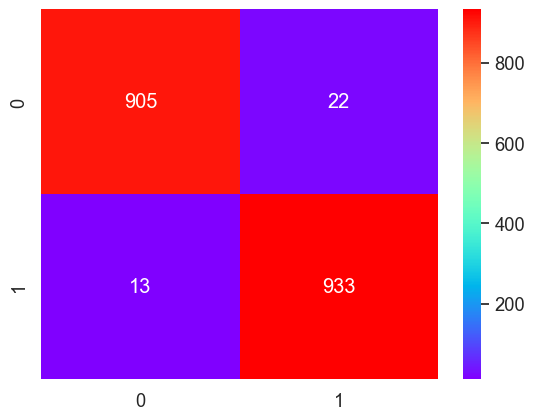

In [92]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.classification_report(y_test, y_test_predict))
#confusion matrix test Data
cm_test_rf = confusion_matrix(y_test, y_test_predict)
sns.set(font_scale = 1.2)
print('Confusion Matrix')
sns.heatmap(cm_test_rf, annot = True,fmt = 'd', cmap='rainbow')

### 5.Model Evaluation

#### Validation

LR: 0.809079 (0.059993)
CART: 0.937118 (0.066869)
RF: 0.979397 (0.021906)


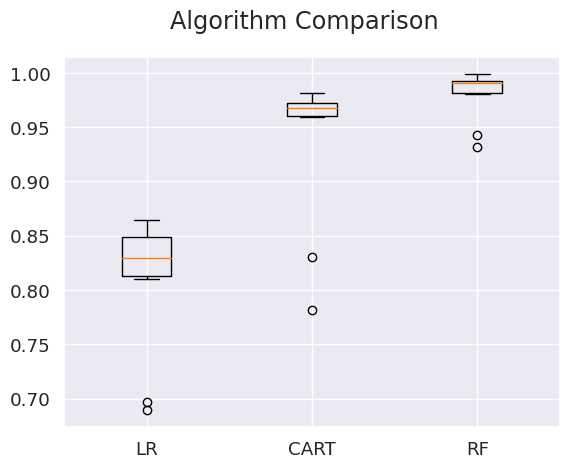

In [93]:
from sklearn import model_selection
# prepare configuration for cross validation test harness
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(random_state=1)))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.style.use('default')
plt.show()